In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')

In [ ]:
df_tesla.columns

Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')

In [ ]:
df_tesla.shape

(124, 3)

In [ ]:
print(f'Largest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [ ]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


In [ ]:
print(df_unemployment.shape)
df_unemployment.head()

(181, 3)


,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [8]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment.UE_BENEFITS_WEB_SEARCH.max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


In [ ]:
print(df_btc_price.shape)
df_btc_price.head()

(2204, 3)


,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [ ]:
print(df_btc_search.shape)
df_btc_search.head()

(73, 2)


,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [9]:
print(f'largest BTC News Search: {df_btc_search.BTC_NEWS_SEARCH.max()}')

largest BTC News Search: 100


In [ ]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [ ]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')

Missing values for BTC price?: True


In [10]:
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')
df_btc_price[df_btc_price.CLOSE.isna()]

Number of missing values: 2


,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


In [90]:
df_tesla.dropna(inplace=True)
df_unemployment.dropna(inplace=True)
df_btc_search.dropna(inplace=True)
df_btc_price.dropna(inplace=True)

### Convert Strings to DateTime Objects

In [91]:
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)

In [13]:
type(df_tesla.MONTH[0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
df_tesla.MONTH.head()

0   2010-06-01
1   2010-07-01
2   2010-08-01
3   2010-09-01
4   2010-10-01
Name: MONTH, dtype: datetime64[ns]

In [12]:
df_btc_monthly = df_btc_price.resample('M', on='DATE').last()

In [13]:
print(df_btc_monthly.shape)
df_btc_monthly.head()

(73, 2)


,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


# Data Visualisation

In [105]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


### Tesla Stock Price v.s. Search Volume

Text(0, 0.5, 'TSLA Search Trend')

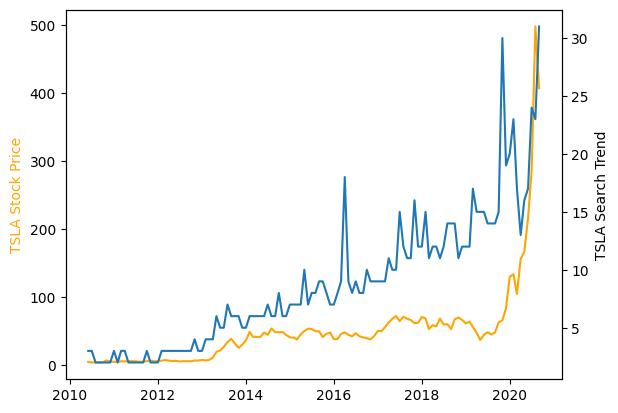

In [14]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='orange')
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH)
ax1.set_ylabel('TSLA Stock Price', color = 'orange')
ax2.set_ylabel('TSLA Search Trend')

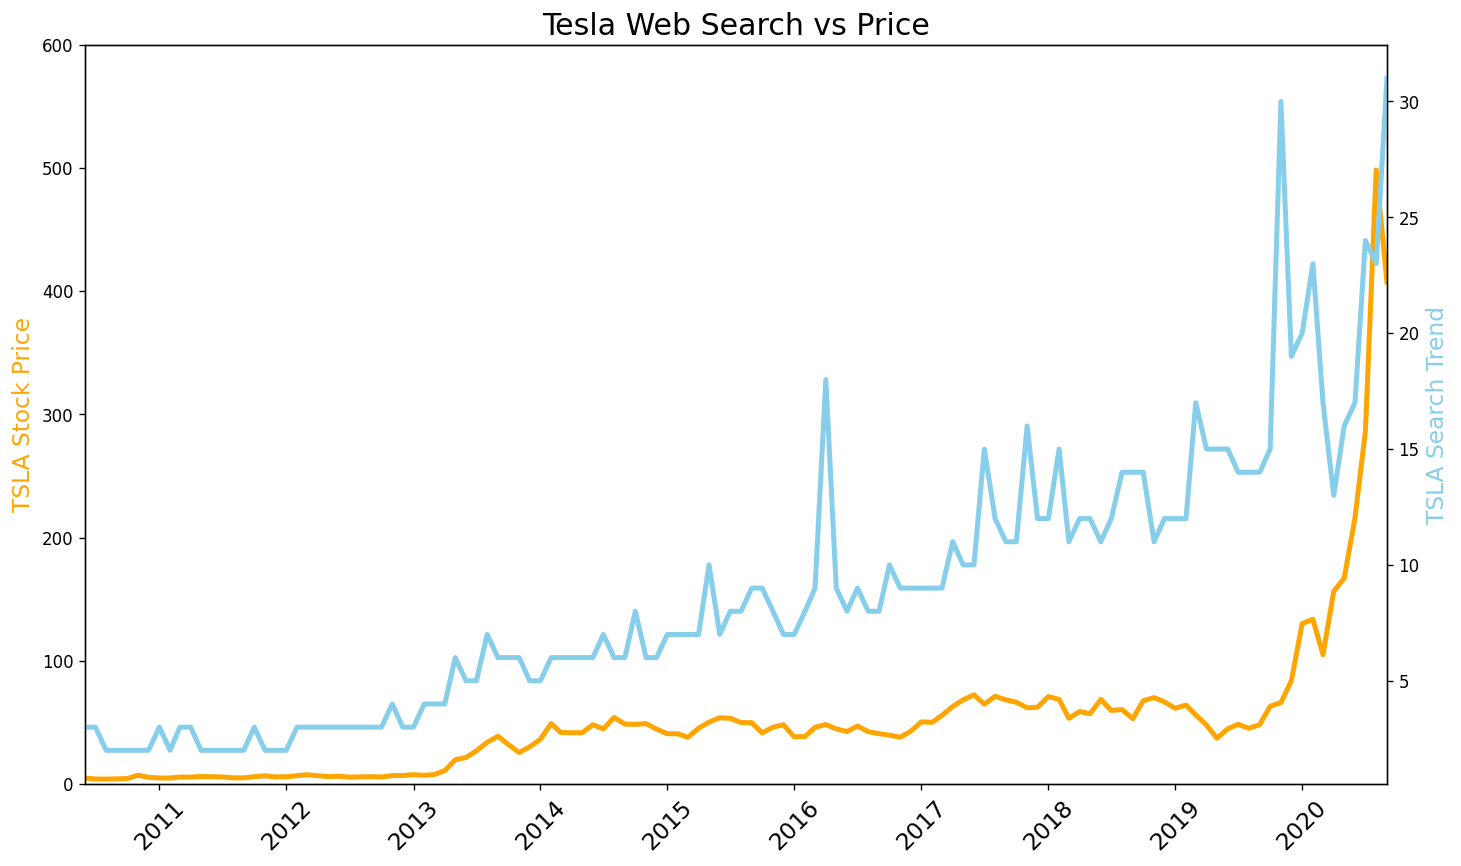

In [32]:
plt.figure(figsize=(14,8), dpi = 120)
plt.title('Tesla Web Search vs Price', fontsize=18)

plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='orange', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color = 'skyblue', linewidth=3)
ax1.set_ylabel('TSLA Stock Price', color = 'orange', fontsize=14)
ax2.set_ylabel('TSLA Search Trend', color = 'skyblue', fontsize=14)

ax1.set_ylim(0, 600)
ax1.set_xlim(df_tesla.MONTH.min(), df_tesla.MONTH.max())


plt.show()

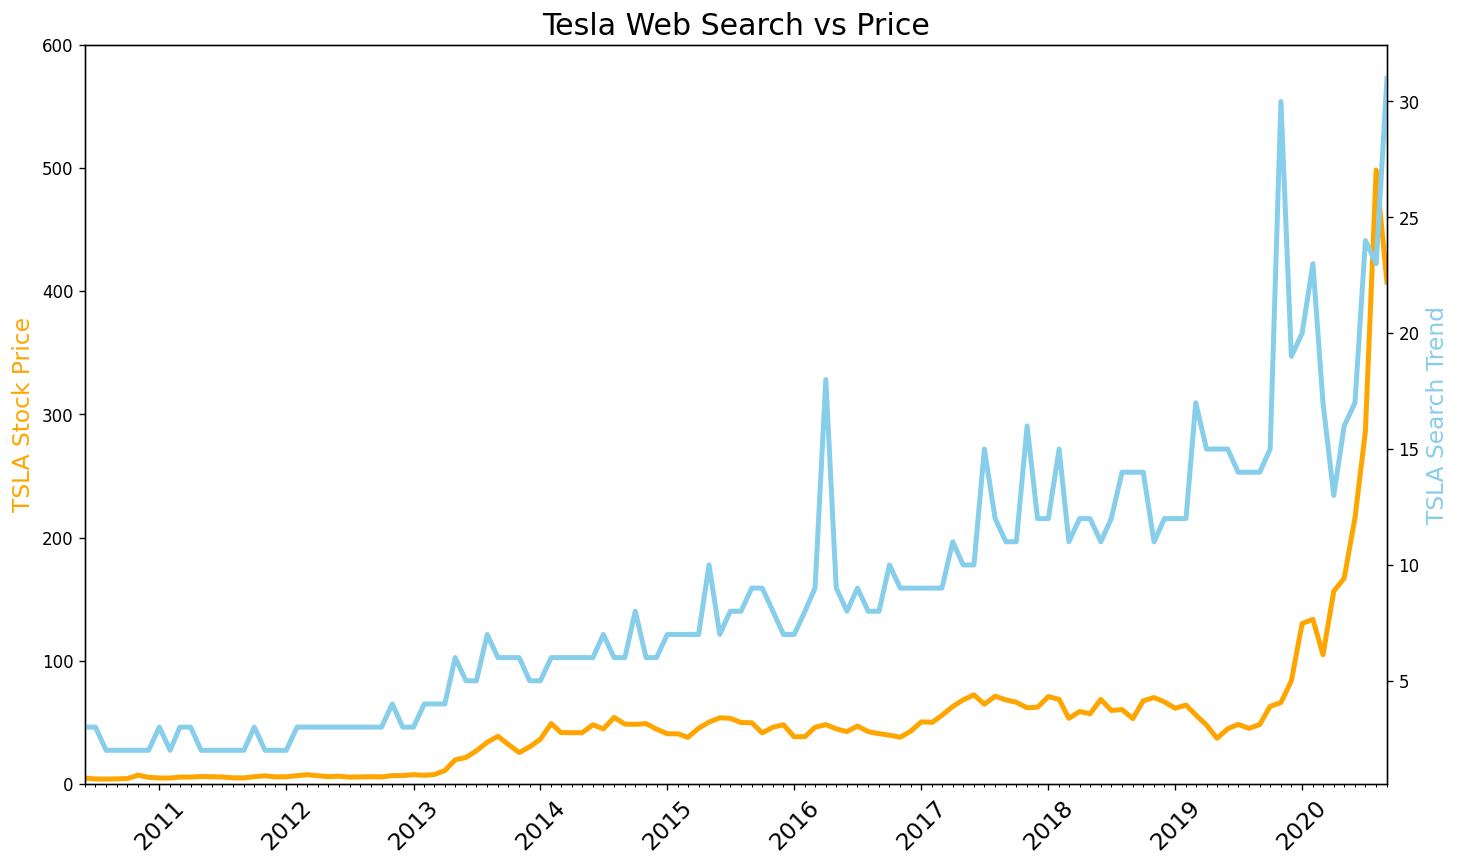

In [41]:
import matplotlib.dates as mdates
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

plt.figure(figsize=(14,8), dpi = 120)
plt.title('Tesla Web Search vs Price', fontsize=18)

plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='orange', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color = 'skyblue', linewidth=3)
ax1.set_ylabel('TSLA Stock Price', color = 'orange', fontsize=14)
ax2.set_ylabel('TSLA Search Trend', color = 'skyblue', fontsize=14)

ax1.set_ylim(0, 600)
ax1.set_xlim(df_tesla.MONTH.min(), df_tesla.MONTH.max())


#ticksax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

(16343.0, 18535.0)

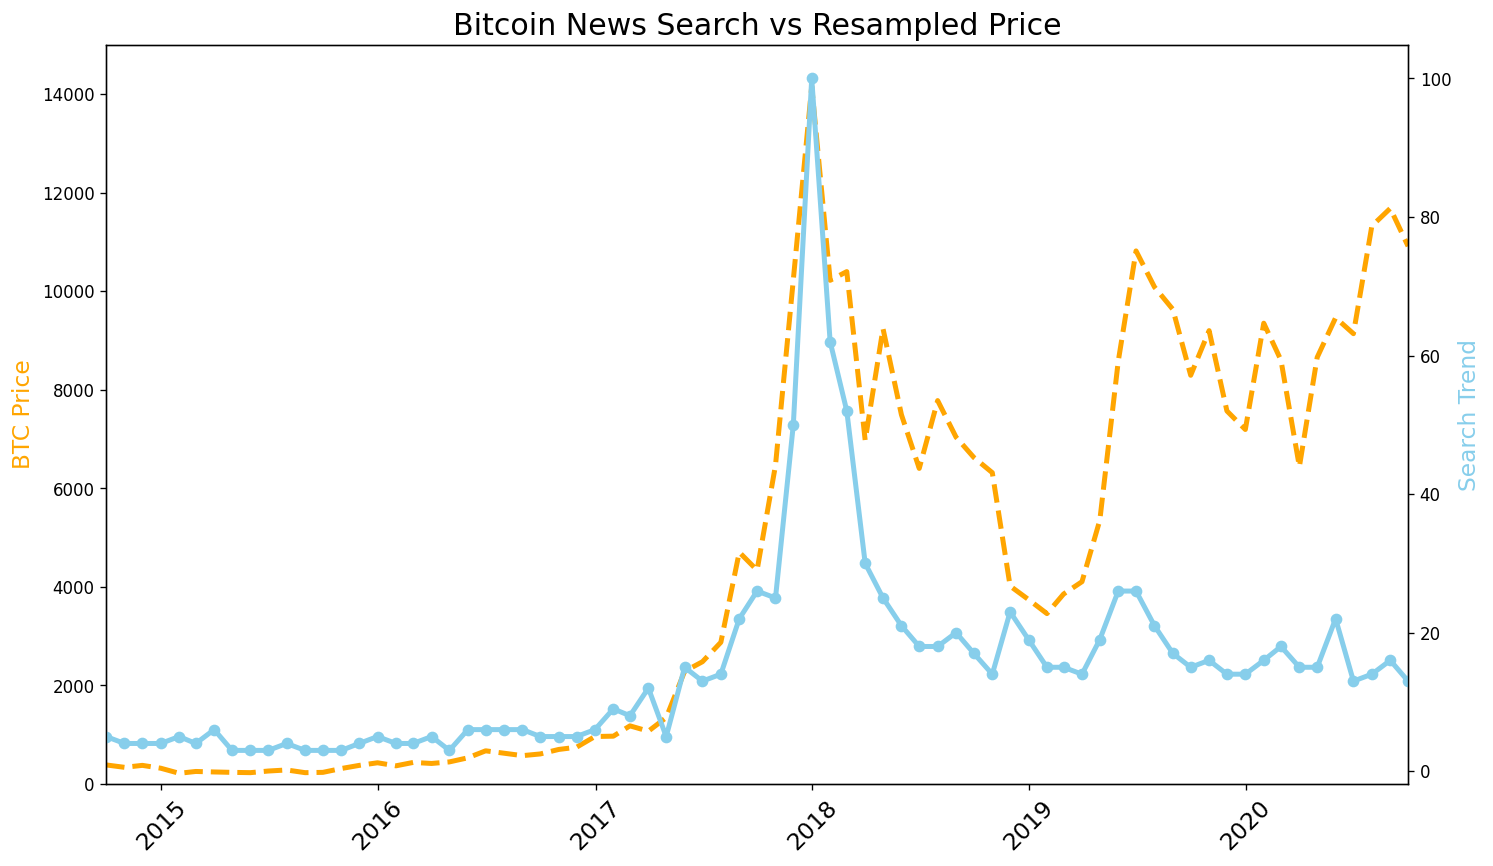

In [60]:
plt.figure(figsize=(14,8), dpi = 120)
plt.title('Bitcoin News Search vs Resampled Price', fontsize=18)

plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df_btc_monthly.index, df_btc_monthly.CLOSE, color='orange', linestyle= '--', linewidth=3)
ax2.plot(df_btc_monthly.index, df_btc_search.BTC_NEWS_SEARCH, color = 'skyblue', marker='o', linewidth=3)
ax1.set_ylabel('BTC Price', color = 'orange', fontsize=14)
ax2.set_ylabel('Search Trend', color = 'skyblue', fontsize=14)

ax1.set_ylim(bottom=0, top=15000)
ax1.set_xlim([df_btc_monthly.index.min(), df_btc_monthly.index.max()])


### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

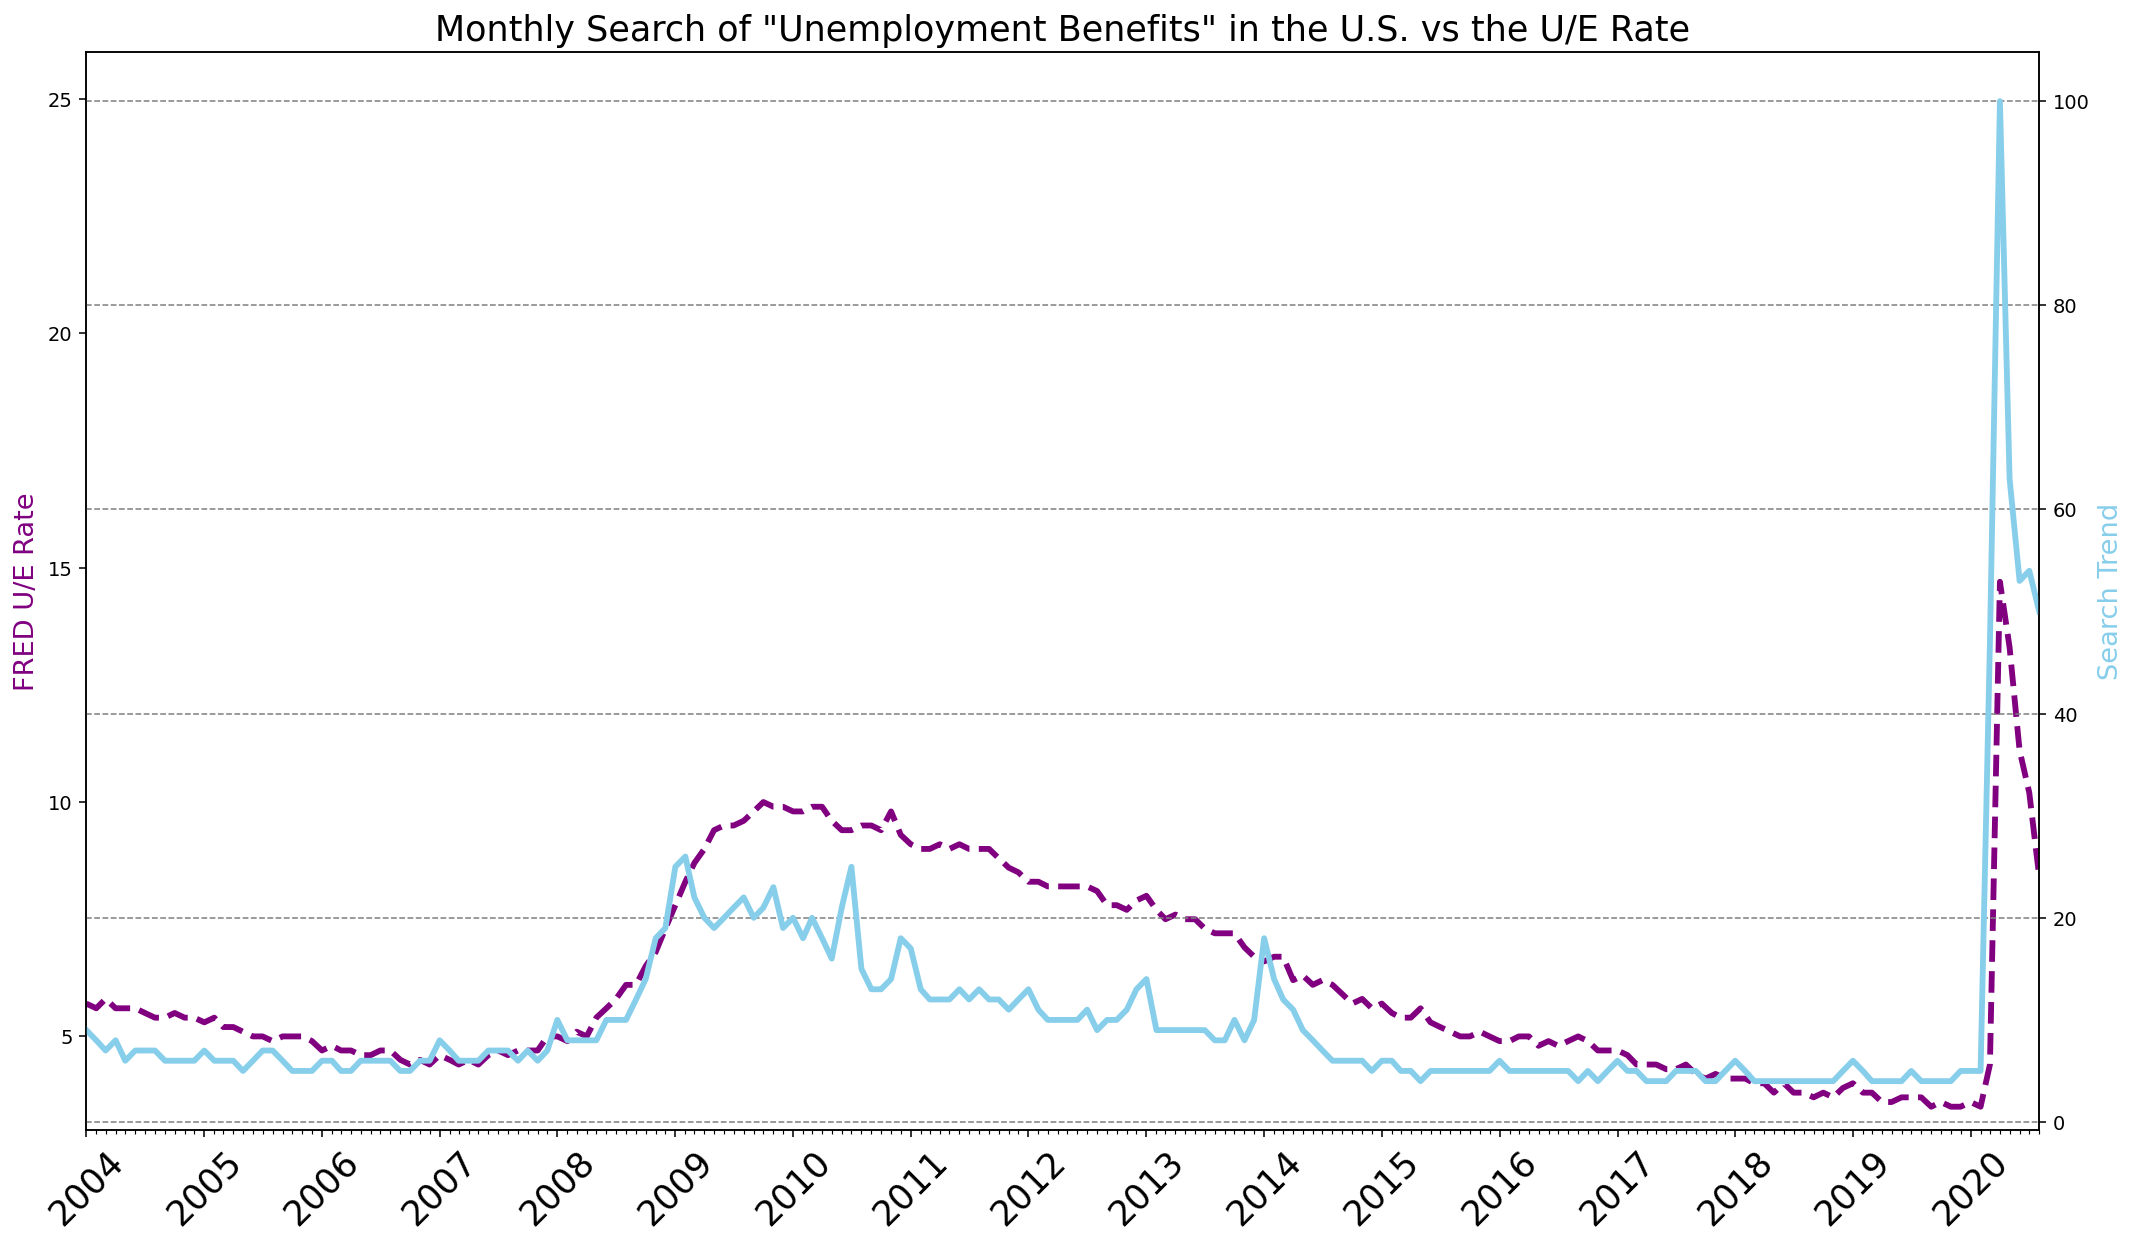

In [96]:
plt.figure(figsize=(18,10), dpi = 140)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.xticks(fontsize=18, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('FRED U/E Rate', color = 'purple', fontsize=14)
ax2.set_ylabel('Search Trend', color = 'skyblue', fontsize=14)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim(bottom=3, top=26)

plt.grid(color='grey', linestyle='--')

ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, color='purple', linestyle= '--', linewidth=3)
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, color = 'skyblue', linewidth=3)

plt.show()

In [100]:
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()
print(roll_df)

     UE_BENEFITS_WEB_SEARCH     UNRATE
0                       NaN        NaN
1                       NaN        NaN
2                       NaN        NaN
3                       NaN        NaN
4                       NaN        NaN
..                      ...        ...
195               27.666667   5.533333
196               37.500000   7.166667
197               45.500000   8.433333
198               53.666667   9.533333
199               61.166667  10.350000

[200 rows x 2 columns]


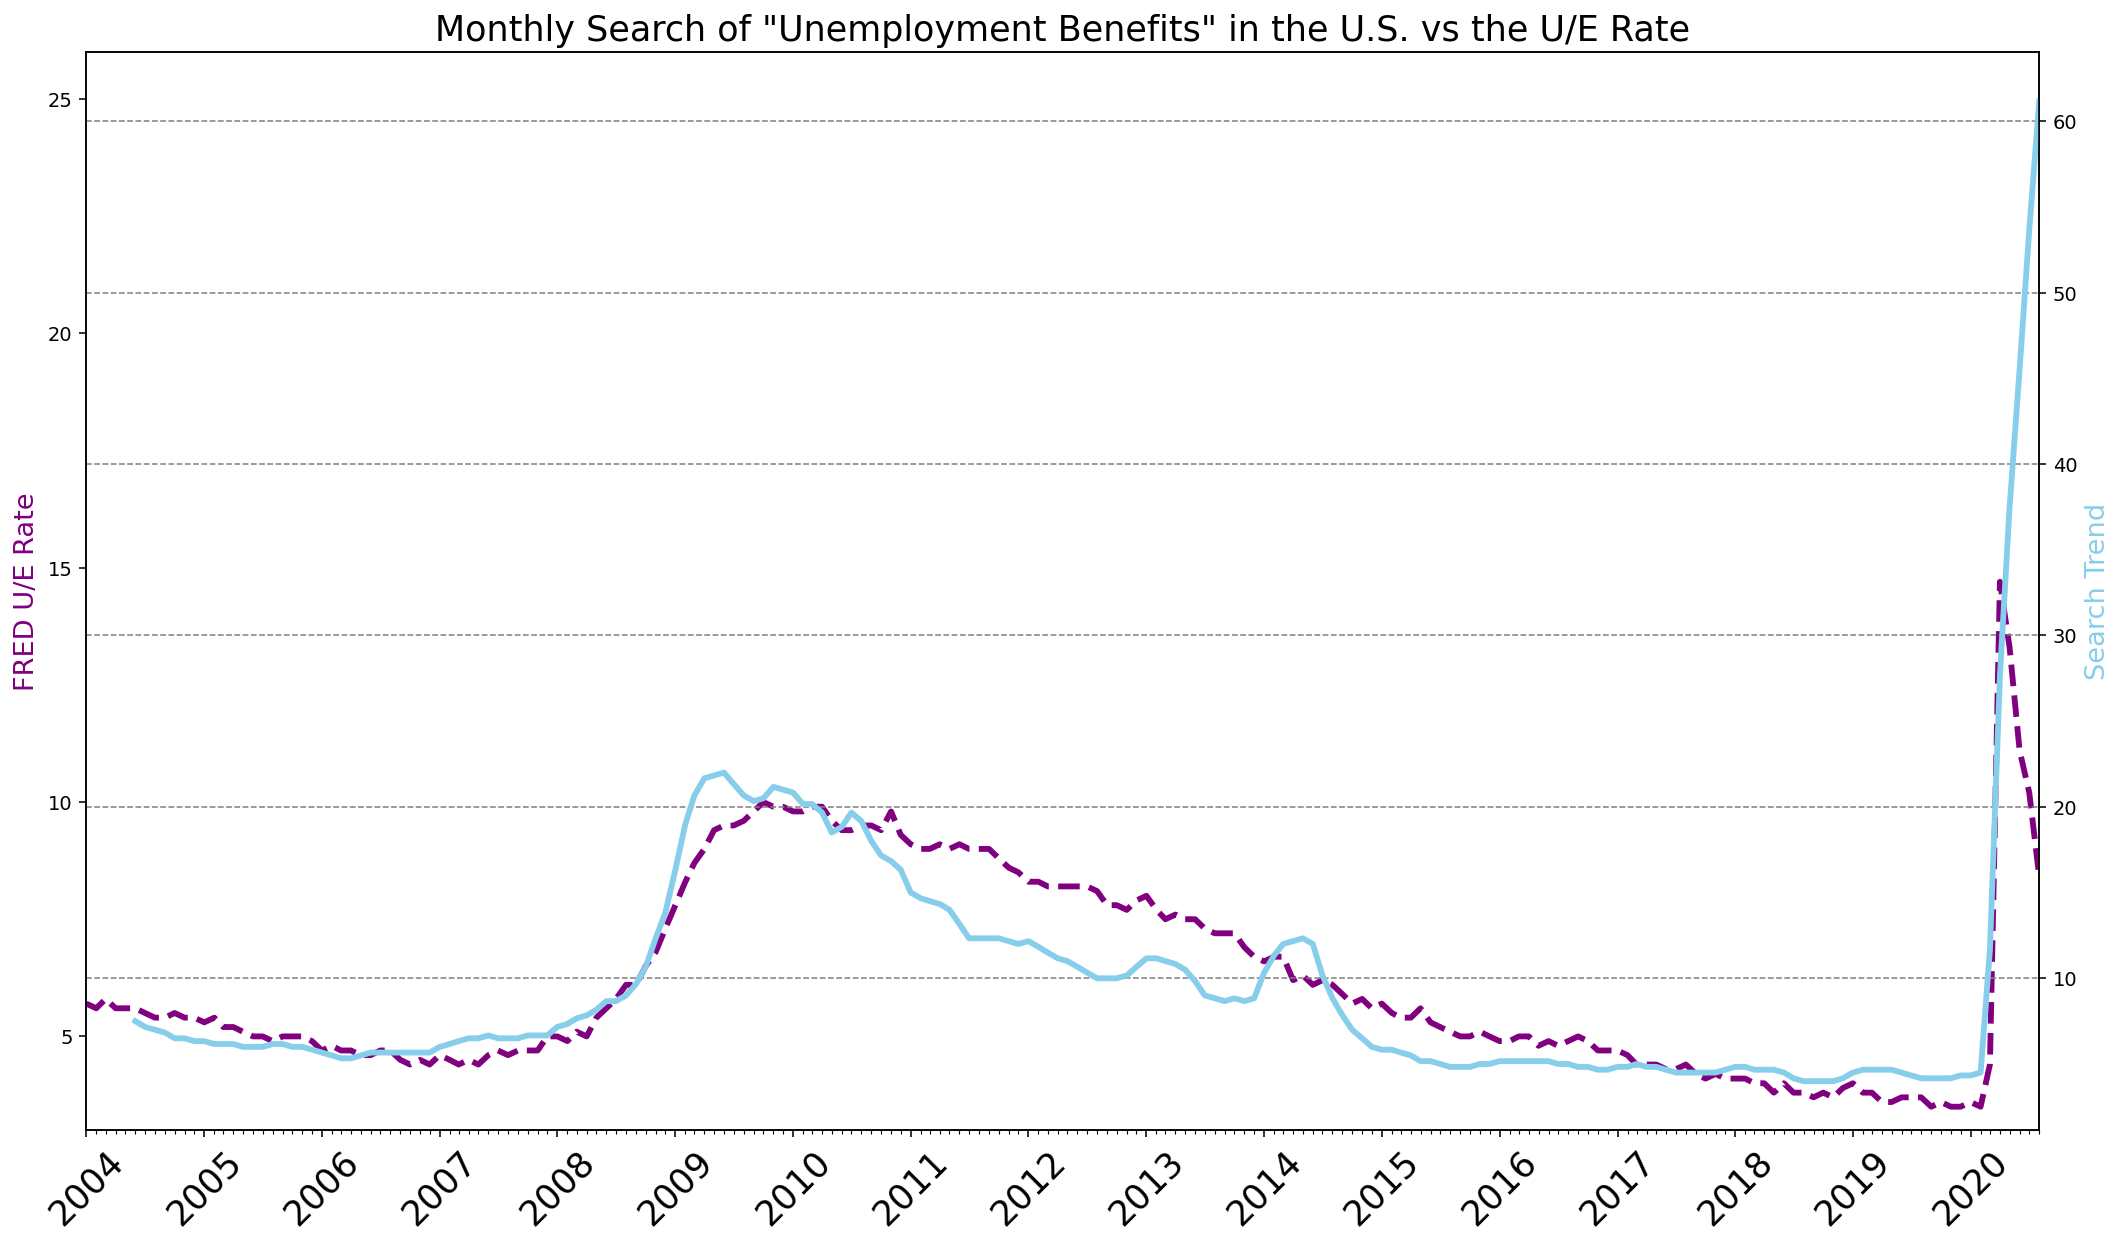

In [104]:
plt.figure(figsize=(18,10), dpi = 140)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.xticks(fontsize=18, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('FRED U/E Rate', color = 'purple', fontsize=14)
ax2.set_ylabel('Search Trend', color = 'skyblue', fontsize=14)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim(bottom=3, top=26)

plt.grid(color='grey', linestyle='--')

ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, color='purple', linestyle= '--', linewidth=3)
ax2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, color = 'skyblue', linewidth=3)

plt.show()